# Parametrize Core Collapse Supernova (CCSN) yields from different groups


We want to know: how much total metals, and how much iron, are produced as a function of progenitor star mass, at the metallicities of GCs ([Fe/H] ~ -2 to -1).


## nuGrid (Pignatari et al. 2016; ApJS, 225, 24)
Paper: http://adsabs.harvard.edu/abs/2016ApJS..225...24P

Data from: http://www.nugridstars.org/data-and-software/yields

## Heger & West group (C&ocirc;t&eacute; et al. 2016; MNRAS, 465, 3755)
Paper: http://adsabs.harvard.edu/abs/2016MNRAS.463.3755C

Data downloaded from: http://2sn.org/Download/NuGrid/GG/ertl.txt by kind permission of Alexander Heger and Chris West

In [1]:
%matplotlib inline

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import yield loading code
from nugrid import nugrid
from westheger import westheger

In [4]:
# Code to plot the yields
def yieldplot(ax, masslist, yieldlist, metallist):
    color_map = plt.cm.Set1
    ncolors = 9
    ax.stackplot(masslist, yieldlist, colors=plt.cm.Set1(np.arange(0, 1, 1./9)), linewidth=0)
    # phantom lines for legend
    for ei in xrange(len(metallist)):
        ax.plot([], [], linewidth=5, color=color_map(np.arange(0, 1, 1./ncolors))[ei % ncolors], label=metallist[ei])
        
    # Plot BH09 parametrization for reference
    massax = np.arange(8, 60, 0.5)
    bh09 = (0.0118 + 0.00548*massax)*massax
    
    ax.plot(massax, bh09, 'k-', label='BH09', alpha=0.1, linewidth=5)
    
    ax.set_xlabel('Mass [M$_{\odot}$]')
    ax.set_ylabel('Cumulative Yield [M$_{\odot}$]')
    ax.set_xlim(10, 60)
    ax.set_ylim(0, 7)
    # legend, reversed
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='best')
    

Plot the following yields:

nuGrid: $\log Z/Z_{\odot}$ = -2.2, -1.2, 0.1

WestHeger: $\log Z/Z_{\odot}$ = -2, -1.5, -1, 0

Compare them to the total Z parametrization used in Bailin & Harris (2009):
$(0.0118 + 0.00548 m) m$

The list of elements plotted are the ones that have any appreciable ($>0.1 M_{\odot}$ basically) yield in at least one of these models.

In [5]:
Zsun = 0.016
nugrid_Z = [0.0001, 0.001, 0.02]
nugrid_Zlabels = ['{0:.1f}'.format(np.log10(x/Zsun)) for x in nugrid_Z]
westheger_Z = [-2, -1.5, -1, 0]
westheger_Zlabels = ['{0:.1f}'.format(x) for x in westheger_Z]

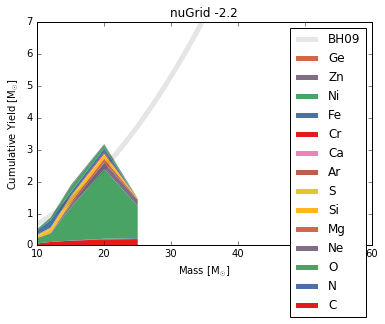

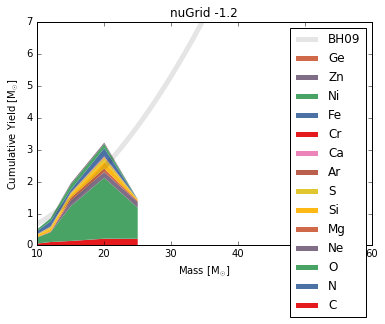

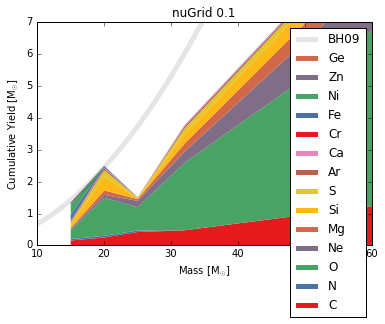

In [6]:
# Plot all nugrid yields
for nuZ, nulab in zip(nugrid_Z, nugrid_Zlabels):
    y = nugrid(nuZ)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    yieldplot(ax, y.masses, y.yields, y.metallist)
    ax.set_title('nuGrid '+nulab)

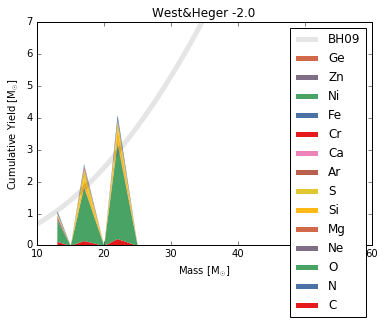

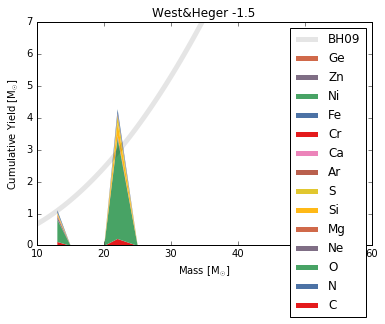

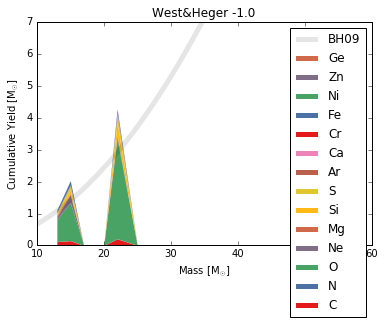

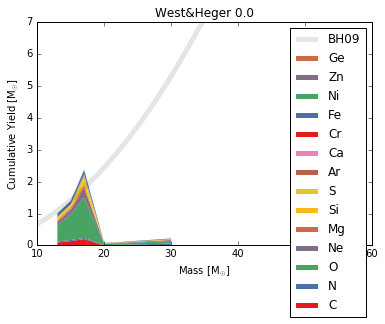

In [7]:
# Plot all WestHeger yields
for whZ, whlab in zip(westheger_Z, westheger_Zlabels):
    y = westheger(whZ)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    yieldplot(ax, y.masses, y.yields, y.metallist)
    ax.set_title('West&Heger '+whlab)

General notes:
 - At $Z_{\odot}$, BH09 does a decent job below around 20 $M_{\odot}$. Above that, there is fallback which dramatically reduces the yield. Should I believe that? nuGrid yields eventually go back up, though not quite to BH09 levels, while WH yields don't.
 - At lower metallicity, the West & Heger yields are extremely sensitive to mass, sometimes giving failed SNe that don't yield *anything*. I don't know whether to take that seriously. nuGrid models don't do that. Both are in agreement that when there is a yield, it is higher than BH09, especially at 15-20 $M_{\odot}$, but nuGrid yields show the same fallback effect between 20-25 $M_{\odot}$ -- but there are no higher models to see if it recovers.
 - UPDATE: WH yields use the Ertl et al. (2016; ApJ 818, 124) BH formation criteria, which creates "islands of non-explodability", which is responsible for the sawtooth appearance of the yields. Figure 3 of C&ocirc;t&eacute;:
![Cote et al. 2016 Figure 3: Remnant mass as a function of stellar mass and metallicity, showing which models explode versus form black holes](Cote16-f3.png "Cote 16 Figure 3")
Although the presence of non-exploding models might be correct, the details seem very sensitive to numerics. What is an appropriate way of dealing with them?

Iron Fraction
-------------
For the first round of GCZCSE, I am nominally looking at iron, really as a tracer for total metallicity. Let's look at whether looking explicitly at iron, either in terms of total mass or in terms of the fraction of the total yield, is useful.

(10, 50)

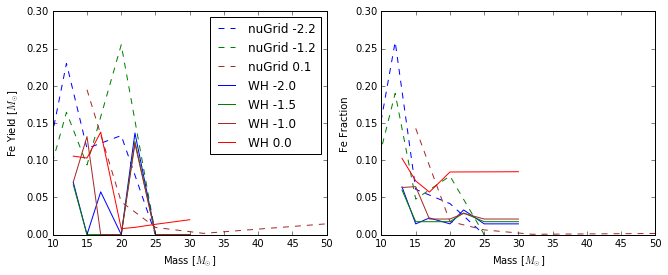

In [8]:
# Get some plot variables ready for colours/linestyles.
Zcolors = ['blue', 'green', 'brown', 'red']
nugrid_style = '--'
westheger_style = '-'
fig = plt.figure()
figsize = fig.get_size_inches()
figsize[0] *= 1.8
fig.set_size_inches(figsize)
ax_tot = fig.add_subplot(121)
ax_frac = fig.add_subplot(122)
ax_tot.set_xlabel('Mass [$M_{\odot}$]')
ax_tot.set_ylabel('Fe Yield [$M_{\odot}$]')
ax_frac.set_xlabel('Mass [$M_{\odot}$]')
ax_frac.set_ylabel('Fe Fraction')

# nuGrid yields
for Z,lab,c in zip(nugrid_Z, nugrid_Zlabels, Zcolors):
    y = nugrid(Z)
    ironindex = y.metallist.index('Fe')
    ax_tot.plot(y.masses, y.yields[ironindex,:], color=c, linestyle=nugrid_style, label='nuGrid {0}'.format(lab))
    ax_frac.plot(y.masses, y.yields[ironindex,:]/y.metaltot, color=c, linestyle=nugrid_style)
# WestHeger yields
for Z,lab,c in zip(westheger_Z, westheger_Zlabels, Zcolors):
    y = westheger(Z)
    ironindex = y.metallist.index('Fe')
    ax_tot.plot(y.masses, y.yields[ironindex,:], color=c, linestyle=westheger_style, label='WH {0}'.format(lab))
    ax_frac.plot(y.masses, y.yields[ironindex,:]/y.metaltot, color=c, linestyle=westheger_style)

ax_tot.legend(loc='best')
ax_frac.set_xlim(10,50)
ax_tot.set_xlim(10,50)

Summary:
 - Absolute iron yields are a giant mass. Don't use them.
 - Fractional yields paint a somewhat better picture... drops from 0.2-0.25 at 10 M$_{\odot}$ to "lower". But how fast, and to what level, depends on the model and metallicity. West & Heger plateaus to 0.02 at low metallicity, but nuGrid really drop to almost zero when there is significant fallback.
 - Total metallicity looks nicer in nuGrid, but iron fraction looks better in West & Heger. Given that they both agree on total metallicity when the West & Heger models explode, it's not crazy to use nuGrid to parametrize total metallicity and then use the 0.02 Fe fraction from WH. I think. But again, not sure how seriously to take these numbers.